In [3]:
%matplotlib inline
import numpy as np
from numpy import argmax
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
cols = [
 'home_player_X1',
 'home_player_X2',
 'home_player_X3',
 'home_player_X4',
 'home_player_X5',
 'home_player_X6',
 'home_player_X7',
 'home_player_X8',
 'home_player_X9',
 'home_player_X10',
 'home_player_X11',
 'away_player_X1',
 'away_player_X2',
 'away_player_X3',
 'away_player_X4',
 'away_player_X5',
 'away_player_X6',
 'away_player_X7',
 'away_player_X8',
 'away_player_X9',
 'away_player_X10',
 'away_player_X11',
 'home_player_Y1',
 'home_player_Y2',
 'home_player_Y3',
 'home_player_Y4',
 'home_player_Y5',
 'home_player_Y6',
 'home_player_Y7',
 'home_player_Y8',
 'home_player_Y9',
 'home_player_Y10',
 'home_player_Y11',
 'away_player_Y1',
 'away_player_Y2',
 'away_player_Y3',
 'away_player_Y4',
 'away_player_Y5',
 'away_player_Y6',
 'away_player_Y7',
 'away_player_Y8',
 'away_player_Y9',
 'away_player_Y10',
 'away_player_Y11']

# data = data[cols]
# data.home_player_X5.describe()


In [10]:
data_new = pd.read_csv("cleaned data with formations/X_resampled_formation.csv")


In [11]:
print(list(data_new.columns))
data_new.shape


['home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4', 'home_player_X5', 'home_player_X6', 'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10', 'home_player_X11', 'home_player_Y1', 'home_player_Y2', 'home_player_Y3', 'home_player_Y4', 'home_player_Y5', 'home_player_Y6', 'home_player_Y7', 'home_player_Y8', 'home_player_Y9', 'home_player_Y10', 'home_player_Y11', 'home_buildUpPlaySpeed', 'home_buildUpPlayDribbling', 'home_buildUpPlayPassing', 'home_chanceCreationPassing', 'home_chanceCreationCrossing', 'home_chanceCreationShooting', 'home_defencePressure', 'home_defenceAggression', 'home_defenceTeamWidth', 'home_player_1_overall_rating', 'home_player_1_potential', 'home_player_1_crossing', 'home_player_1_finishing', 'home_player_1_heading_accuracy', 'home_player_1_short_passing', 'home_player_1_volleys', 'home_player_1_dribbling', 'home_player_1_curve', 'home_player_1_free_kick_accuracy', 'home_player_1_long_passing', 'home_player_1_ball_control', 'ho

(23292, 903)

In [19]:
rating_cols = [name for name in data_new.columns if name[-len('overall_rating'):] == 'overall_rating']
rating_cols += [name for name in data_new.columns if name[-len('aggression'):] == 'aggression']
rating_cols += [name for name in data_new.columns if name[-len('positioning'):] == 'positioning']
data = data_new[cols + rating_cols]
data.shape

(23292, 112)

In [23]:
features = np.zeros(shape=(23292, 2, 9, 11, 3))
min_ = data_new[rating_cols].min().min()
max_ = data_new[rating_cols].max().max()
for i, row in data.iterrows():
    match_features = []
    for team in ['home_player', 'away_player']:
        img = np.zeros(shape=(9, 11, 3))
        for player in range(1, 12):
            x, y = int(row[team + '_X'+str(player)]-1),int(row[team + '_Y' + str(player)]-1)
            if player == 1: 
                x += 4
            img[x,y,0] = row[team+'_'+str(player)+'_overall_rating']
            img[x,y,1] = row[team+'_'+str(player)+'_aggression']
            img[x,y,2] = row[team+'_'+str(player)+'_positioning']
        match_features.append(img)
    match_features = np.array(match_features)
    features[i] = match_features


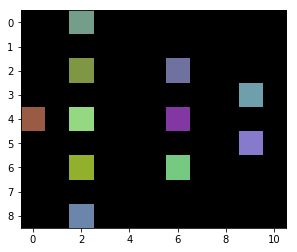

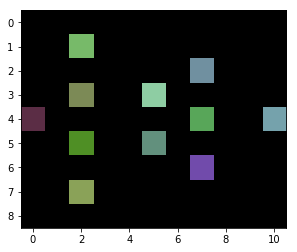

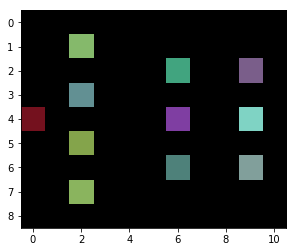

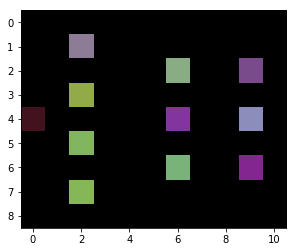

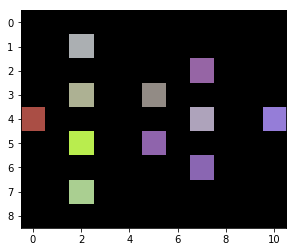

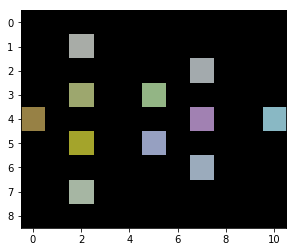

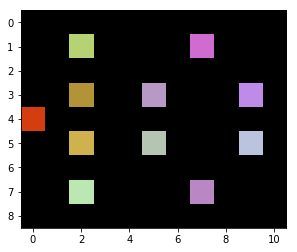

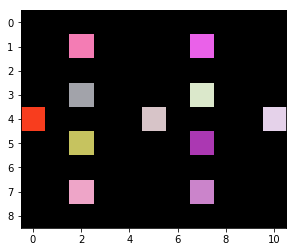

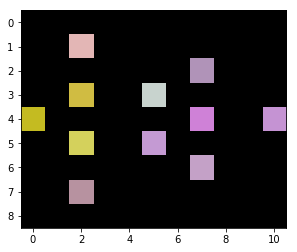

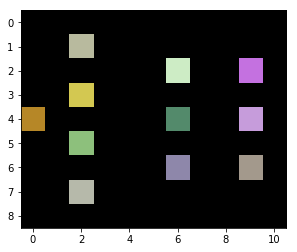

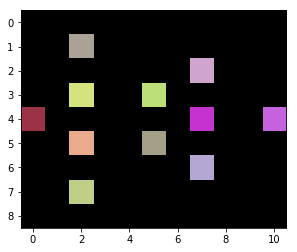

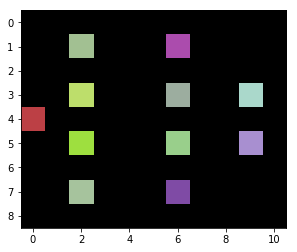

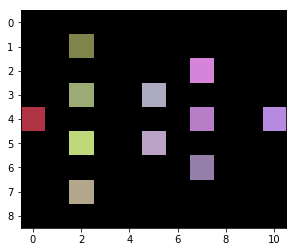

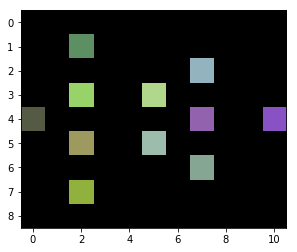

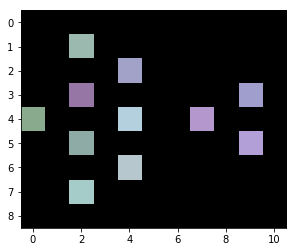

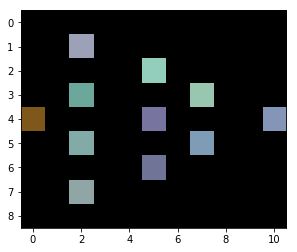

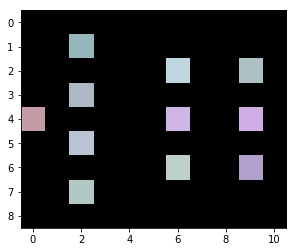

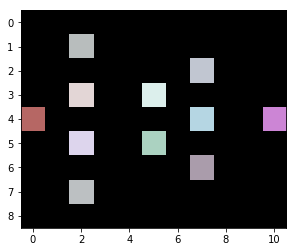

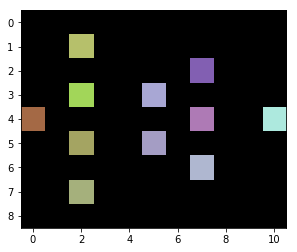

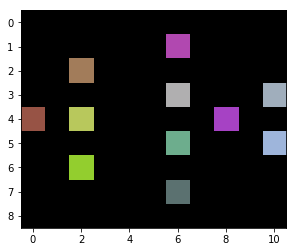

In [24]:

for row in features[100:110]:
    for img in row:
        plt.figure()
        plt.imshow(img)